In [10]:
from multiprocess import Pool
import numpy as np
import time

def do_all(input):
    from kniffel_forimport import run_game
    return run_game(printscoreboard=False)

if __name__ == '__main__':
    start_time = time.time()
    n = 1000
    scores = []
    iterations = [1 for _ in range(n)]
    p = Pool()
    scores = p.map(do_all, iterations)
    p.close()
    p.join()

    stop_time = time.time()
    total_time = stop_time - start_time
    hours = int(total_time // 3600)
    minutes = int((total_time % 3600) // 60)
    seconds = int(total_time % 60)
    print("Total time:", f"{hours:02d}:{minutes:02d}:{seconds:02d}")
    print("Average score:", np.mean(scores))
    print("Highest score:", np.max(scores))
    print("Lowest score:", np.min(scores))
    print("Samples:", len(scores))
    print("Samples per second:", np.round(len(scores) / total_time, 2))

Total time: 00:02:45
Average score: 250.315
Highest score: 449
Lowest score: 144
Samples: 1000
Samples per second: 6.05


In [ ]:
import matplotlib.pyplot as plt

plt.hist(scores, bins=389, density=True) # 63, 84, 126, 251
plt.xlabel('Sum')
plt.ylabel('Normalized Frequency')
plt.title('1000 Samples (one kniffel, avg 248.8)')
plt.show()

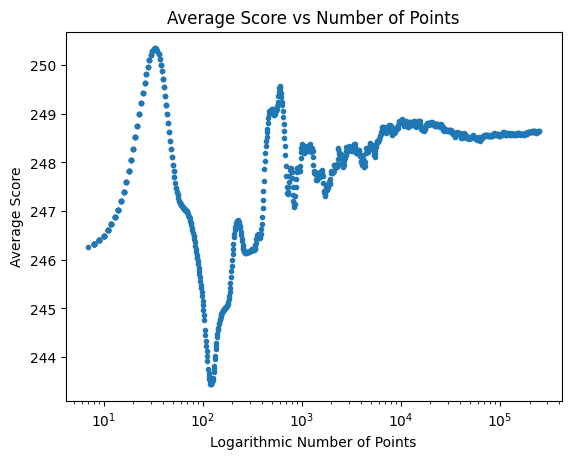

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


# Load the file content
file_path = r"C:\Users\paulk\Documents\Programmieren\Python\Kniffel\saves\250000samples_30012024\scores.txt"
with open(file_path, 'r') as file:
    file_content = file.read()

# Convert the file content to a numpy array and filter it
filtered_numbers = np.fromstring(file_content, sep='\n')
# minimum, maximum = 200, 320
# filtered_numbers = [num for num in sums if num >= minimum and num <= maximum]
# Apply Gaussian filter to the numbers in sums
filtered_numbers = gaussian_filter(filtered_numbers, sigma=10)
# filtered_numbers = filtered_numbers[:2000]


# Calculate the logarithmic number of points
numbers = np.floor(np.logspace(0.9, np.log10(len(filtered_numbers)), num=1000, base=10))

# Calculate the average score
avg_list = []
for number in numbers:
    avg_list.append(np.mean(filtered_numbers[-int(number):]))

# Plot the average score over the logarithmic number of points
plt.plot(numbers, avg_list, '.')
plt.xlabel('Logarithmic Number of Points')
plt.ylabel('Average Score')
plt.title('Average Score vs Number of Points')
plt.xscale('log')
plt.show()


In [1]:
def main():
    import cProfile
    import pstats
    from kniffel_forimport import run_game

    with cProfile.Profile() as pr:
        run_game()

    stats = pstats.Stats(pr)
    stats.sort_stats(pstats.SortKey.TIME)
    stats.print_stats()

if __name__ == '__main__':
    main()

Name    	 Test
Ones    	 2
Twos    	 2
Threes  	 3
Fours   	 8
Fives   	 10
Sixes   	 6
Sum     	 31
Bonus   	 0
Total 1 	 31
One pair	 10
Two pairs	 22
Triple  	 18
Quadruple	 0
Full house	 30
Small straigth	 25
Big straight	 40
Kniffel 	 0
Chance  	 19
Total 2 	 164
Total   	 195
         2238651 function calls in 1.684 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   300030    0.469    0.000    0.469    0.000 {method 'index' of 'list' objects}
       30    0.299    0.010    0.812    0.027 c:\Users\paulk\Documents\Programmieren\Python\Kniffel\kniffel_forimport.py:218(get_reroll_state_propability)
       30    0.205    0.007    1.681    0.056 c:\Users\paulk\Documents\Programmieren\Python\Kniffel\kniffel_forimport.py:249(collect_decision_parameters)
   290344    0.163    0.000    0.531    0.000 c:\Users\paulk\Documents\Programmieren\Python\Kniffel\kniffel_forimport.py:162(calc_score_field)
   290344    0.124    0.000    0

<function matplotlib.pyplot.show(close=None, block=None)>

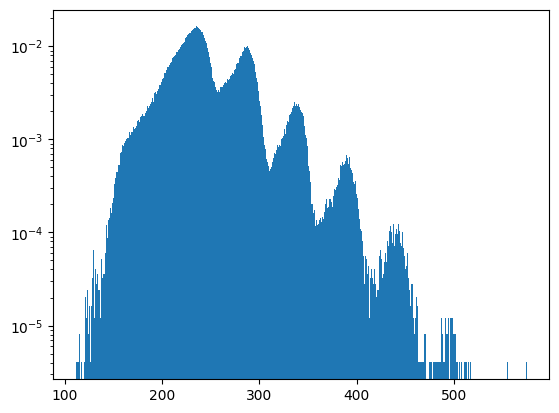

In [7]:
import numpy as np
import matplotlib.pyplot as plt
file_path = r"C:\Users\paulk\Documents\Programmieren\Python\Kniffel\saves\250000samples_30012024\scores.txt"
file_content = np.loadtxt(file_path)

plt.hist(file_content, bins=465, density=True) # 63, 84, 126, 251
plt.yscale('log')
plt.show
